## 1. OR 게이트 학습 및 시각화
### OR 게이트를 은닉층 1개를 이용해 분리하세요.

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 정의
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# 2. 모델 정의
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

# 3. 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 학습
for epoch in range(1000):
    output = model(X)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 5. 예측
with torch.no_grad():
    preds = model(X)
    print("예측 결과:")
    print(torch.round(preds))

예측 결과:
tensor([[0.],
        [1.],
        [1.],
        [1.]])


### 코드 분석과 함꼐 시각화를 해주세요.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_linear_boundary(model, X, y):

    # NumPy로 변환
    X_np = X.numpy() 
    y_np = y.numpy().flatten() 

    # 각 클래스 점 찍기
    markers = ['o', 's']
    for i in range(2):
        plt.scatter(X_np[y_np == i][:, 0], X_np[y_np == i][:, 1],
                    marker=markers[i], label=f"Class {i}",
                    edgecolors='k', s=80, color='skyblue')

    # 결정 경계 그리기
    x1 = np.linspace(-0.1, 1.1, 100)
    x2 = np.linspace(-0.1, 1.1, 100)
    xx, yy = np.meshgrid(x1, x2)
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        preds = model(grid_tensor).numpy().reshape(xx.shape)

    plt.contour(xx, yy, preds, levels=[0.5], colors='deepskyblue', linewidths=2)

    # 축 설정
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.title("OR Gate Decision Boundary")
    plt.show()

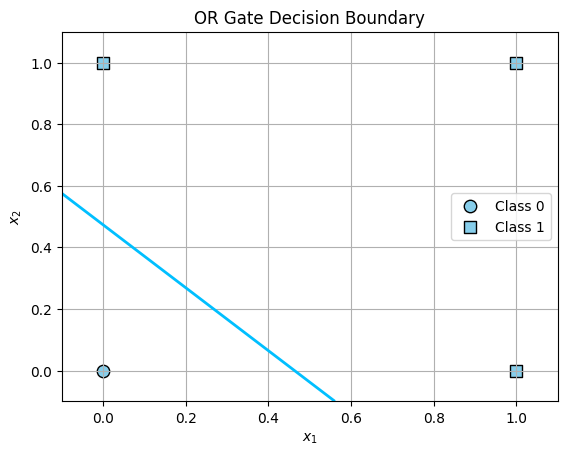

In [27]:
plot_linear_boundary(model, X, y)

## 2. XOR 게이트 학습 시도 및 한계 시각화
### XOR 게이트를 은닉층 1개 이용해 분리하세요.

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 정의
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 2. 모델 정의
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

# 3. 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 학습
for epoch in range(1000):
    output = model(X)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 5. 예측
with torch.no_grad():
    preds = model(X)
    print("예측 결과:")
    print(torch.round(preds))

예측 결과:
tensor([[0.],
        [0.],
        [0.],
        [0.]])


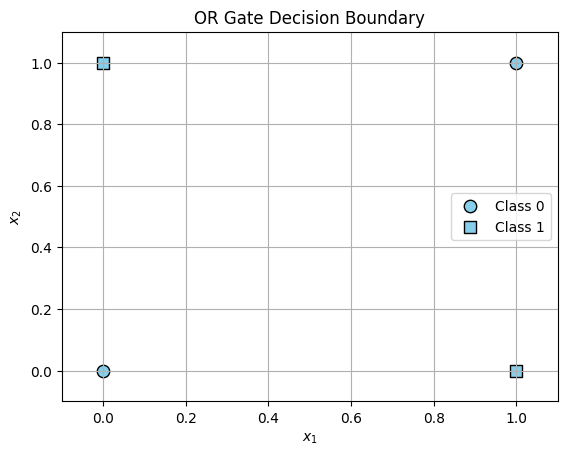

In [29]:
plot_linear_boundary(model, X, y)

### 분리가 되지 않는 이유를 적어주세요.

위 그림을 보면, 0과 1을 구분하기 위해서는 한 개의 선형 경계가 여러 개의 경계가 필요함을 알 수 있다. 하지만 위 신경망은 한 개의 선형 경계만을 가지기 때문에 분리할 수 없는 것이다.

## 3. XOR 게이트 학습 및 시각화
### XOR 게이트를 DNN을 이용해 분리하세요.

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 정의
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 2. 모델 정의
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

# 3. 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 학습
for epoch in range(1000):
    output = model(X)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 5. 예측
with torch.no_grad():
    preds = model(X)
    print("예측 결과:")
    print(torch.round(preds))

예측 결과:
tensor([[0.],
        [1.],
        [1.],
        [0.]])


### 코드 분석과 시각화를 해주세요.

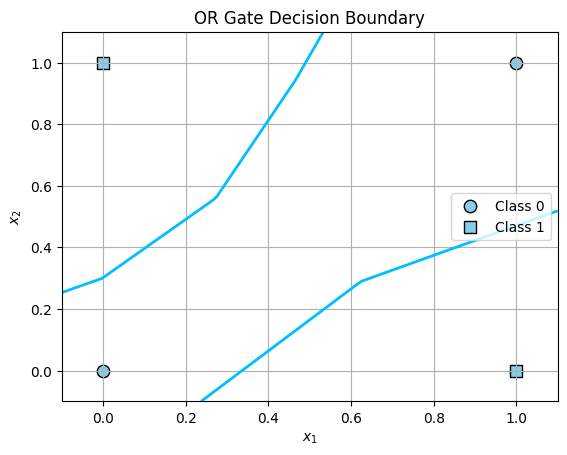

In [35]:
plot_linear_boundary(model, X, y)

### 분리가 되는 이유를 적어주세요.

위 그림을 보면, 경계선을 2개 사용함으로써 0과 1이 하나의 선형 경계로 분리되지 않는 문제를 극복했음을 알 수 있다. 즉, 은닉층 1개를 사용할 때에는 하나의 선형 경계만을 사용하지만, 은닉층 여러 개를 사용하면서 여러 개의 경계를 사용하여 이 문제를 해결한 것이다.